<a href="https://colab.research.google.com/github/Jtandoh01/Disease-Prediction-ML-DCIT311/blob/KNN-Preview/End_of_semester_project_DCIT313.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Library Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd .read_csv("./diabetes.csv")


# Data Preprocessing


In [3]:
print(data.columns)
print(data.shape)
print(data.dtypes )
print(data.isnull().values.sum())
print(data.describe().T)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(2000, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
0
                           count       mean         std     min     25%  \
Pregnancies               2000.0    3.70350    3.306063   0.000   1.000   
Glucose                   2000.0  121.18250   32.068636   0.000  99.000   
BloodPressure             2000.0   69.14550   19.188315   0.000  63.500   
SkinThickness             2000.0   20.93500   16.103243   0.000   0.000   
Insulin                   2000.0   80.25400  111.180534   0.000   0.000   
BMI                       2000.0   32.1

# Getting the Feature and the Target Variable from the Dataset

In [4]:
features = data.iloc[:,:-1]
target = data.iloc[:,-1].values
print(features.shape)
print(target.shape)

(2000, 8)
(2000,)


# Visualing the features to find possible outliers and check for nature of the dataset

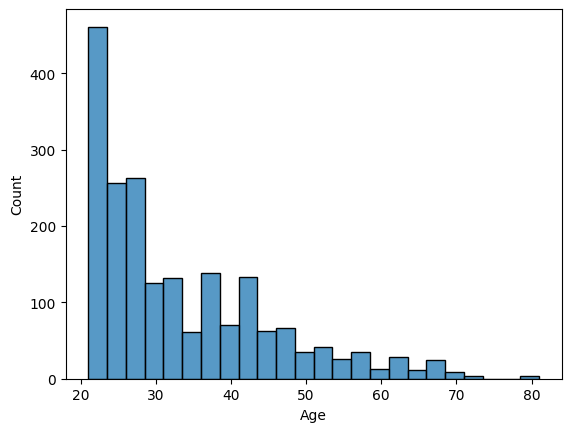

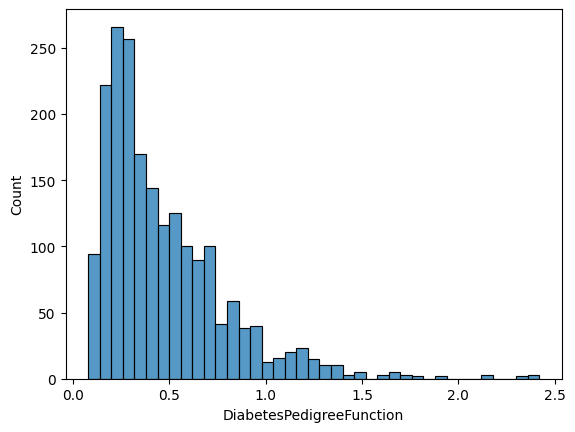

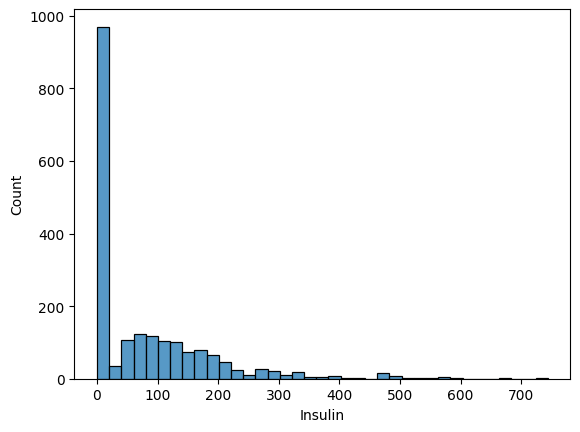

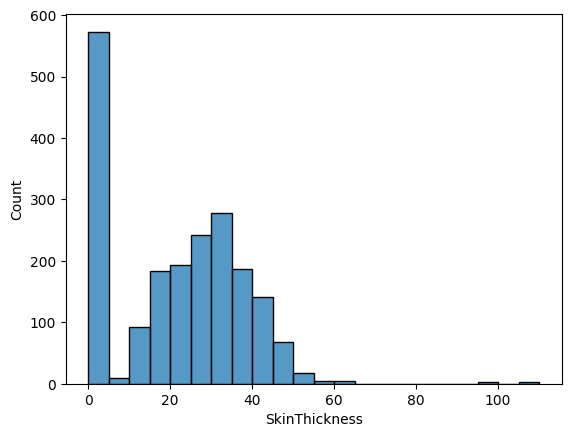

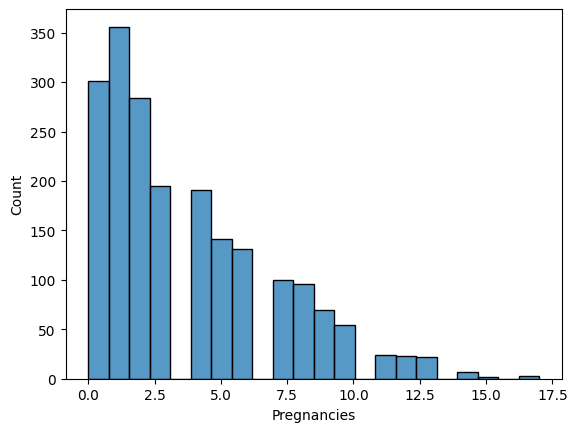

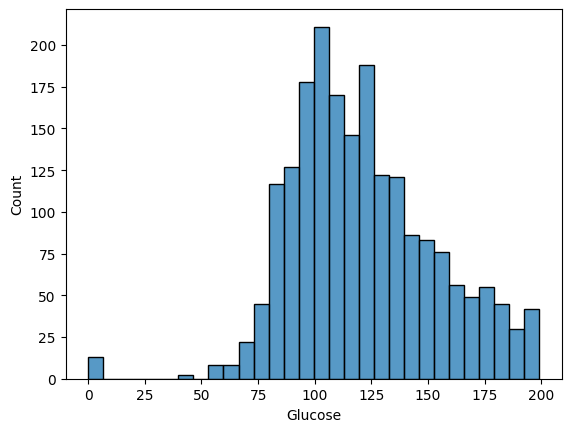

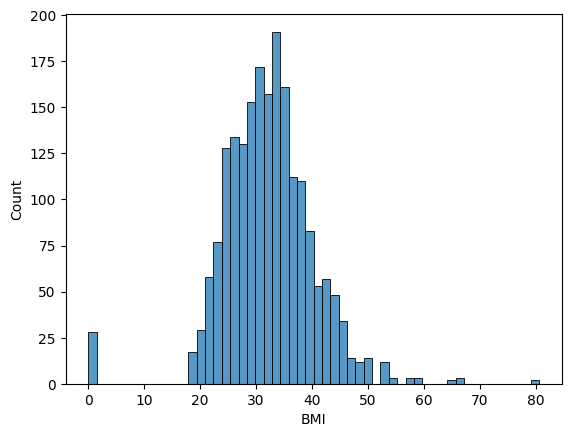

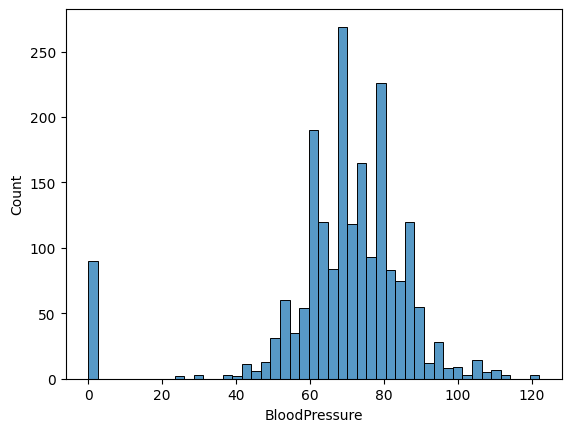

In [5]:
sns.histplot(data=data,x='Age')
plt.show()

sns.histplot(data=data,x ='DiabetesPedigreeFunction')
plt.show()

sns.histplot(data=data,x ='Insulin')
plt.show()

sns.histplot(data=data, x="SkinThickness")
plt.show()
sns.histplot(data= data, x= 'Pregnancies')
plt.show()
sns.histplot(data =data, x = 'Glucose')
plt.show()
sns.histplot(data =data, x = 'BMI')
plt.show()
sns.histplot(data =data, x = 'BloodPressure')
plt.show()

# Replacing zero values of the features: BMI, BloodPressure, Insulin, Glucose and SkinThickness with different strategies

In [6]:
from sklearn.impute import SimpleImputer

features_and_strategy={
    'Glucose': 'mean',
    'Insulin': 'mean',
    'BMI': 'mean',
    'SkinThickness': 'median',
    'BloodPressure': 'median'
}

for column,strategy in features_and_strategy.items():
  features[column].replace(0,np.nan,inplace=True)
  imputer = SimpleImputer(strategy=strategy)
  features[column] = imputer.fit_transform(features[[column]])

In [7]:

zero_values_check = features[features_and_strategy.keys()].eq(0).sum()
print("Zero values after replacement:")
print(zero_values_check)

Zero values after replacement:
Glucose          0
Insulin          0
BMI              0
SkinThickness    0
BloodPressure    0
dtype: int64


# Revisualizing features after zero value replacement

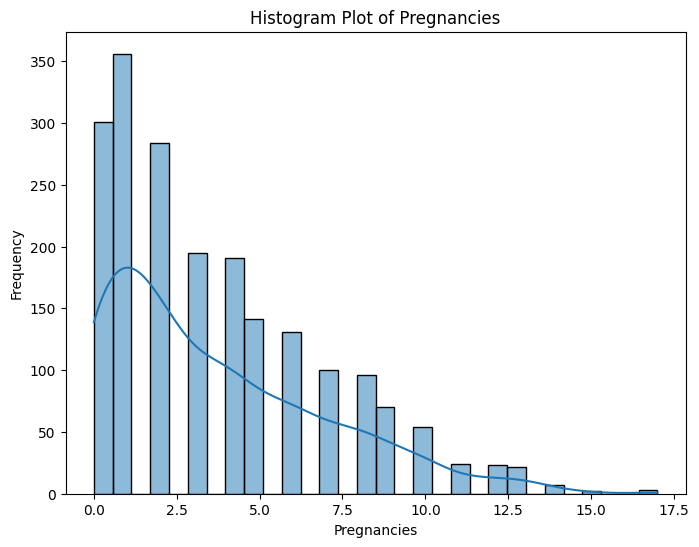

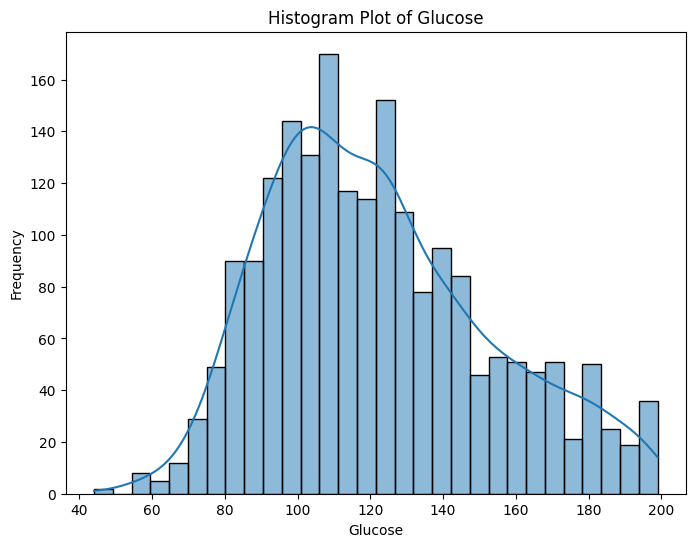

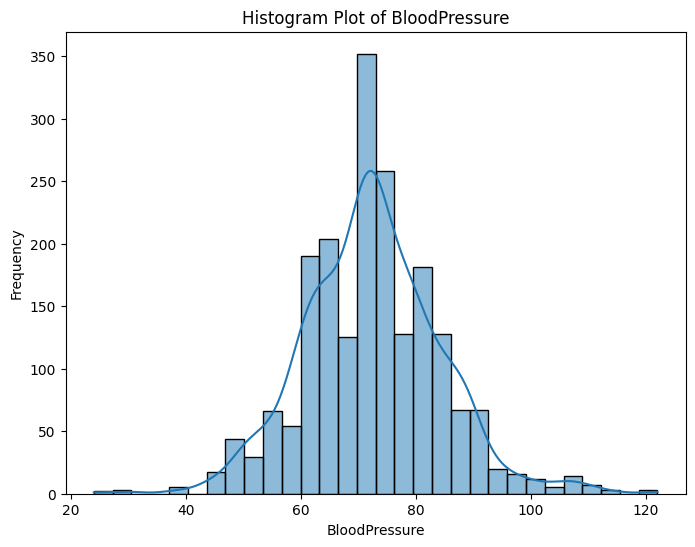

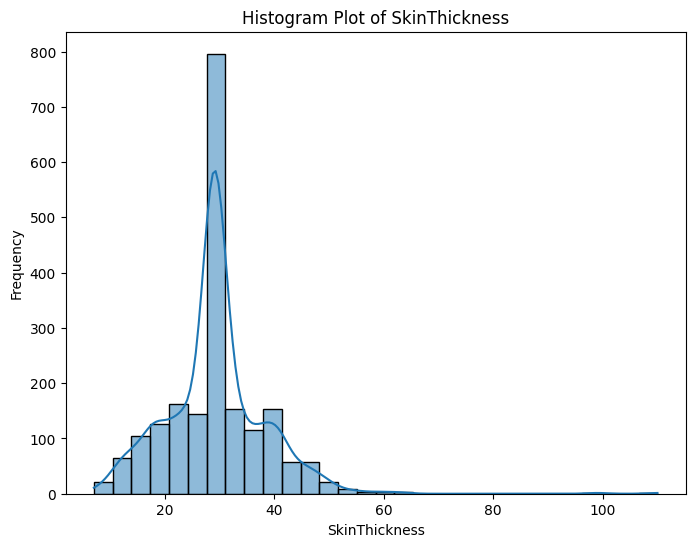

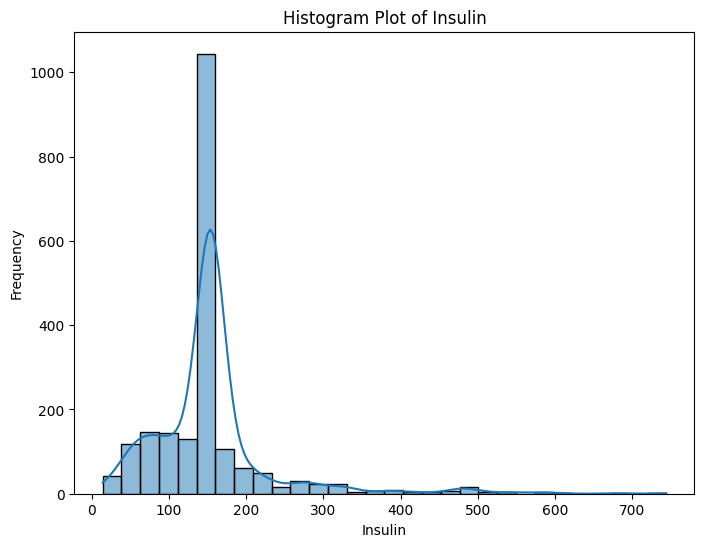

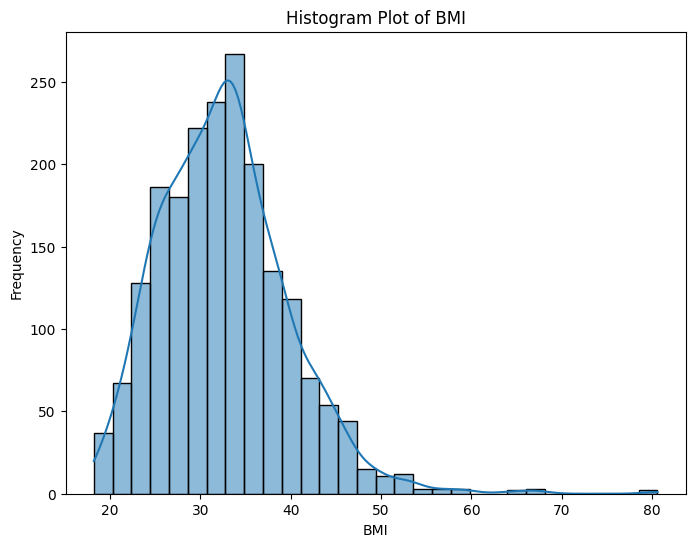

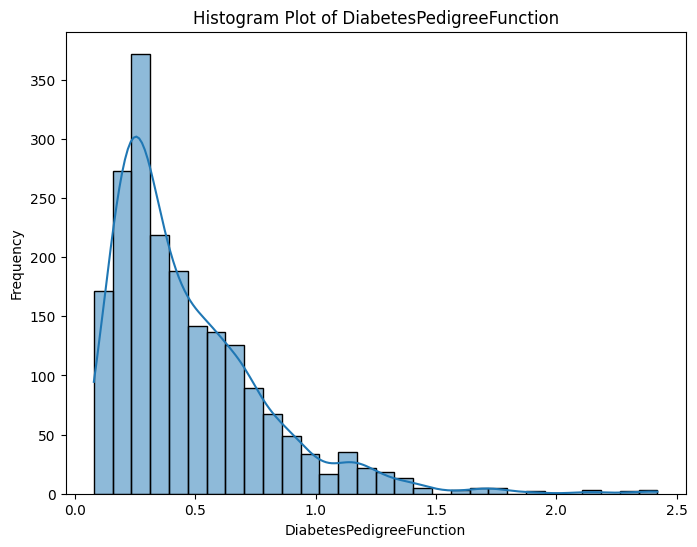

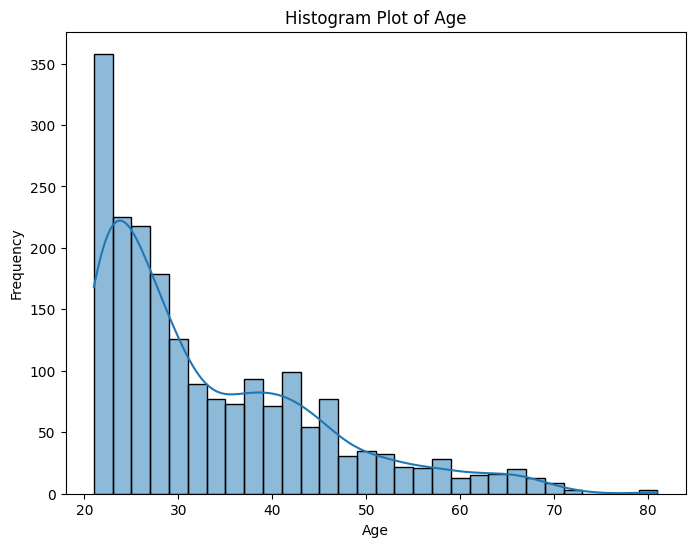

In [8]:
features_to_visualize = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in features_to_visualize:
  plt.figure(figsize=(8, 6))
  sns.histplot(features[column], bins=30, kde=True)
  plt.title(f'Histogram Plot of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

#Checking for data imbalance using the seaborn countplot method

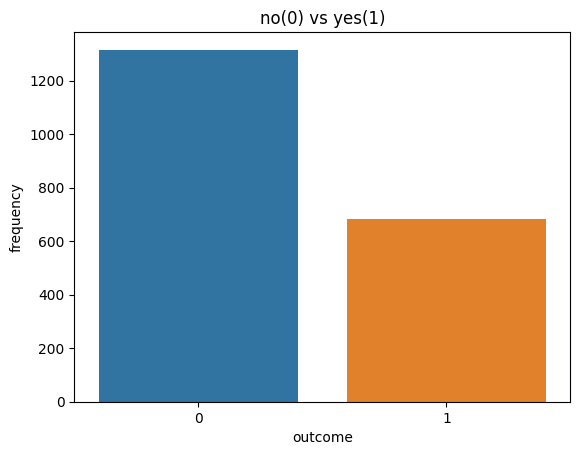

In [9]:
sns.countplot(data= data, x='Outcome')
plt.xlabel("outcome")
plt.ylabel("frequency")
plt.title("no(0) vs yes(1)")
plt.show()


# Fixing Issues Data Inbalance with SMOTETomek technique

In [10]:
from imblearn.combine import SMOTETomek
smtk = SMOTETomek(random_state=42)
features_resampled,target_resampled = smtk.fit_resample(features,target)
print(features_resampled.shape, target_resampled.shape)
print(type(target_resampled))
print(type(features_resampled))

(2632, 8) (2632,)
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


# Converting the resampled target data to a pandas DataFrame

In [11]:
target_resampled = pd.DataFrame(data=target_resampled,columns=['target_resampled'])
print(type(target_resampled))

<class 'pandas.core.frame.DataFrame'>


# Combining sampled features and target into a new dataset

In [12]:
resampled_data = pd.concat([features_resampled,target_resampled],axis=1)

In [13]:
features_resampled = resampled_data.iloc[:,:-1]
target_resampled = resampled_data.iloc[:,-1]
feature_to_drop = 'Insulin'
features = features.drop(feature_to_drop,axis=1)
features_resampled = features_resampled.drop(feature_to_drop,axis=1)

#Visualizing original dataset target and sampled dataset target variables side by side.

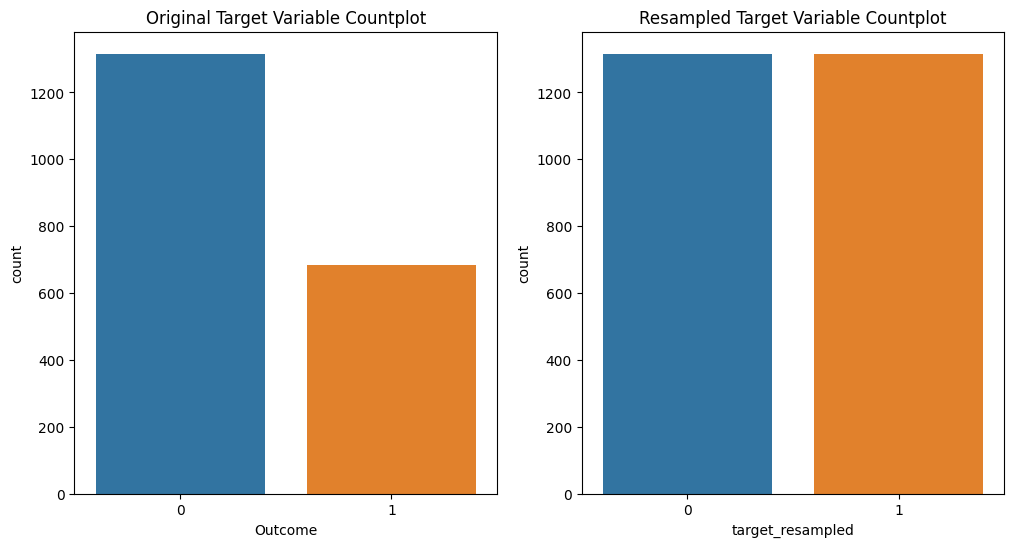

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=data)
plt.title('Original Target Variable Countplot')

plt.subplot(1, 2, 2)
sns.countplot(x='target_resampled', data=resampled_data)
plt.title('Resampled Target Variable Countplot')
plt.show()

# Creation of cross validator object

In [15]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5)

# Train-Test Split for Original Dataset and Resampled Dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42, stratify=target)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(features_resampled, target_resampled, test_size=0.25, random_state=42)

# Using pearson's correlation coefficient to find the correlation between features

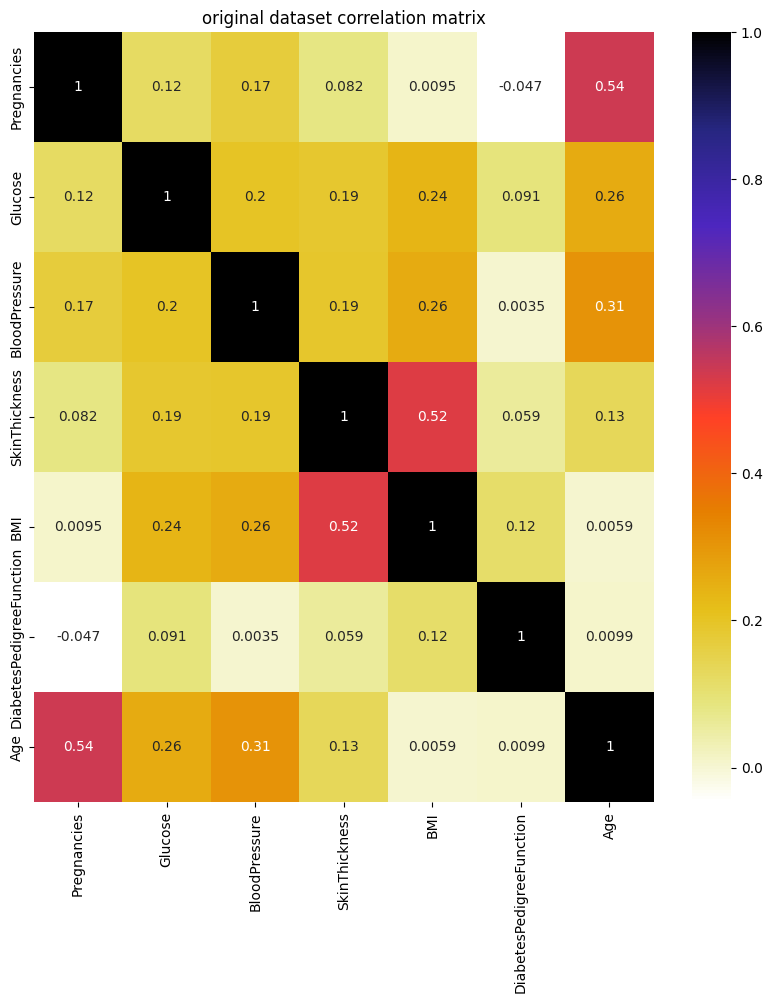

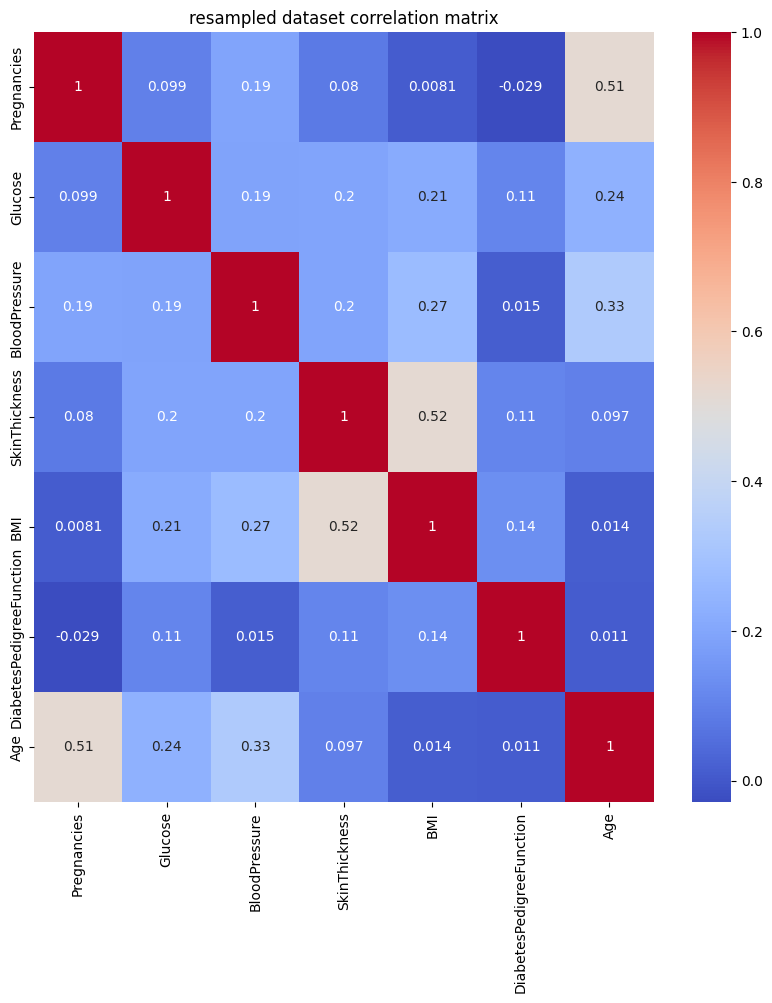

In [17]:
X_train.corr()
plt.figure(figsize=(10,10))
correlation = X_train.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('original dataset correlation matrix')
plt.show()

X_train_res.corr()
plt.figure(figsize=(10,10))
correlation = X_train_res.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('resampled dataset correlation matrix')
plt.show()

# Feature Selection ,Feature Scaling,Model Building , Using The Pipeline Interface

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# 1. Support Vector Classifier

In [19]:
from sklearn.svm import SVC

model_svc = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('SelectKBest', SelectKBest(score_func=mutual_info_classif)),
    ('SVC', SVC())
])


# A parameter list to pass to GridSearch Cross Validator

In [20]:
C_options = [0.1, 1, 10,100]
K_options = [3, 4, 5]
kernels = ['poly', 'rbf']

param_grid = [
    {
        'SelectKBest__k': K_options,
        'SVC__C': C_options,
        'SVC__kernel':kernels

    },
]

# Gridsearch CV takes model, parameter list,KFold cross validator as parameters

In [21]:
from sklearn.model_selection import GridSearchCV
search_grid_svc = GridSearchCV(estimator = model_svc,param_grid=param_grid, cv= cv, scoring='roc_auc')

# Fitting The TRAIN set of sampled dataset to the GridSearchCV object to find the optimal hyperparameters, cross validation scores and most optimal model

In [22]:
search_grid_svc.fit(X_train_res,y_train_res)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('StandardScaler', StandardScaler()),
                                       ('SelectKBest',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x7d874d0167a0>)),
                                       ('SVC', SVC())]),
             param_grid=[{'SVC__C': [0.1, 1, 10, 100],
                          'SVC__kernel': ['poly', 'rbf'],
                          'SelectKBest__k': [3, 4, 5]}],
             scoring='roc_auc')

# Cross Validaton Results, Best Hyperparameters and Best estimator from GridSearchCV

In [23]:
best_params = search_grid_svc.best_params_
average_score = np.mean(search_grid_svc.cv_results_['mean_test_score'])

print("Best Hyperparameters:", best_params)
print("Cross validator mean test score:", average_score)

optimal_model_svc = search_grid_svc.best_estimator_



Best Hyperparameters: {'SVC__C': 100, 'SVC__kernel': 'rbf', 'SelectKBest__k': 5}
Cross validator mean test score: 0.8395446381970433


# Fitting Resampled Data to optimal model

In [24]:
optimal_model_svc.fit(X_train_res,y_train_res).score(X_train_res,y_train_res)

0.8915906788247214

# Testing model on resampled test data and original test data

In [25]:
y_pred = optimal_model_svc.predict(X_test)
y_pred_res = optimal_model_svc.predict(X_test_res)

# Metrics

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix for SVC on original dataset: \n{}".format(cm))

acc = classification_report(y_test,y_pred, labels=[0,1])
print("\nClassification report for SVC on original dataset: \n{}".format(acc))


Confusion matrix for SVC on original dataset: 
[[282  47]
 [ 15 156]]

Classification report for SVC on original dataset: 
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       329
           1       0.77      0.91      0.83       171

    accuracy                           0.88       500
   macro avg       0.86      0.88      0.87       500
weighted avg       0.89      0.88      0.88       500



In [27]:

cm = confusion_matrix(y_test_res,y_pred_res)
print("\nConfusion matrix for SVC on sampled dataset: \n{}".format(cm))

acc = classification_report(y_test_res,y_pred_res, labels=[0,1])
print("\nClassification report for SVC on sampled dataset: \n{}".format(acc))


Confusion matrix for SVC on sampled dataset: 
[[264  55]
 [ 44 295]]

Classification report for SVC on sampled dataset: 
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       319
           1       0.84      0.87      0.86       339

    accuracy                           0.85       658
   macro avg       0.85      0.85      0.85       658
weighted avg       0.85      0.85      0.85       658



# 2. K-Nearest Neighbours


In [35]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train_res, y_train_res)

params = {
    "selectkbest__k": range(1,7,2),
    "classifier__n_neighbors": range(3,15, 2),
    "classifier__weights": ["uniform", "distance"],
    "classifier__metric": ["minkowski", "manhattan", "euclidean"],
    "classifier__leaf_size": range(1,50,5)
}

In [36]:
model_knn = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('selectkbest', SelectKBest(score_func=mutual_info_classif)),
    ('classifier', KNeighborsClassifier()),
])
search_grid_knn = GridSearchCV(estimator= model_knn, param_grid= params, cv = cv, scoring= "roc_auc", error_score='raise')

In [37]:
search_grid_knn.fit(X_train_res,y_train_res)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise',
             estimator=Pipeline(steps=[('StandardScaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x7d874d0167a0>)),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__leaf_size': range(1, 50, 5),
                         'classifier__metric': ['minkowski', 'manhattan',
                                                'euclidean'],
                         'classifier__n_neighbors': range(3, 15, 2),
                         'classifier__weights': ['uniform', 'distance'],
                         'selectkbest__k': range(1, 7, 2)},
             scoring='roc_auc')

# Cross Validation Results

In [40]:
best_param_knn =  search_grid_knn.best_params_
average_score = np.mean(search_grid_knn.cv_results_['mean_test_score'])

print("Best Hyperparameters for KNN classifier:",best_param_knn)
print("Average mean test score for GridSCV: ",average_score)

Best Hyperparameters for KNN classifier: {'classifier__leaf_size': 11, 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 13, 'classifier__weights': 'distance', 'selectkbest__k': 5}
Average mean test score for GridSCV:  0.8930214007273136


# Optimal KNN Classifier

In [44]:
optimal_model_knn = search_grid_knn.best_estimator_

optimal_model_knn.fit(X_train_res,y_train_res).score(X_train_res,y_train_res)


1.0

In [45]:
y_pred_knn = optimal_model_knn.predict(X_test)
print("Kneighbor classifier calssification report(original data):\n{}".format(classification_report(y_test,y_pred_knn,labels=[0,1])))
print("Kneighbor classifier confusion matrix(original data):\n{}".format(confusion_matrix(y_test,y_pred_knn)))

Kneighbor classifier calssification report(original data):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       329
           1       0.98      0.99      0.99       171

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500

Kneighbor classifier confusion matrix(original data):
[[326   3]
 [  1 170]]


In [47]:
y_pred_knn = optimal_model_knn.predict(X_test_res)
print(classification_report(y_test_res,y_pred_knn,labels=[0,1]))
print("Kneighbor classifier confusion matrix for sampled data:\n{}".format(confusion_matrix(y_test_res,y_pred_knn)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       319
           1       0.98      0.97      0.97       339

    accuracy                           0.97       658
   macro avg       0.97      0.97      0.97       658
weighted avg       0.97      0.97      0.97       658

Kneighbor classifier confusion matrix for sampled data:
[[311   8]
 [  9 330]]
